<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
#Bibliotecas do código
# import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MaxNLocator, LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

import scipy
from scipy import stats
from scipy.optimize import minimize
import scipy.ndimage as ndimage
import scipy.constants as sc

%matplotlib inline

from scipy.optimize import minimize

Perda de energia do muon em cobre [Cu]
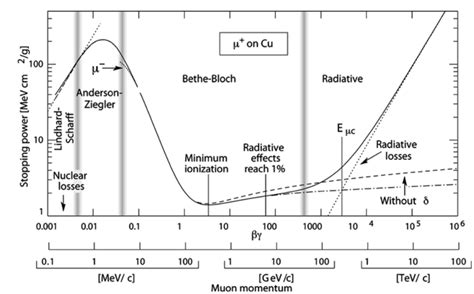

In [2]:
#Definição do intervalo de energias do muon [Eloss]
#Intervalo de confiança com erro <2% Ref.:PDG 2020 página 532
#Lesparre definiu seu intervalo com Eμ≤E≤1000 GeV 
#Pena, MUYSC, definiu seu intervalo no código com 0.01,1e4 GeV
#Pena usa a divisão em 10000000.
E_Lesparre = np.linspace(0.01,1e3,10000000) # GeV
E_MUYSC = np.linspace(0.01,1e4,10000000) # GeV
E = E_Lesparre

In [3]:
#Um gigaelétron-volt é igual a 1e9 elétron-volts: 1 GeV = 1e9 eV 
#A energia (E) em gigaelétron-volts (GeV) é igual
#à energia (E) em elétron-volts (eV) dividida por 1e9 :
#Portando, E (GeV) = E (eV) / 10 9 = E (eV) / 1 000 000 000
#A unidade convencional é MeV/1e3, ou eV/1e9.
#Eu = 105.658  # muon mass [MeV/c2] /1e3 =   :  0.105658 ~> 0.10566 GeV
Eu = 0.10566   #[GeV]
E_tot = E + Eu #[GeV]      

In [4]:
#Perda de Energia do Muon
#Polinomio de quarto grau de Lesparre sobre a perda de energia do muon em rocha padrão
# dEdp [MeV g−1cm2] ou [MeV cm²/g], dá no mesmo. A convenção é usar dEdp [MeV g−1cm2].

y = np.log10(E)  #Energia que entra, está em GeV.
#coeficientes de ajuste do polinômio
l0 = 0.2549
l1 = 0.0801
l2 = 0.0368
l3 = -0.0461
l4 = 0.0154
#o polinômio:
dEdp = -10**((l4*y**4) + (l3*y**3)  + (l2*y**2) + (l1*y) + (l0))  

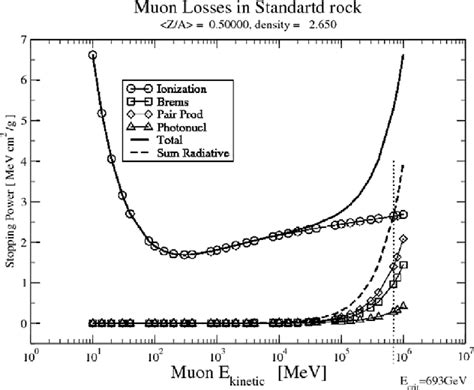
Ref.: https://www.researchgate.net/figure/Muon-energy-loss-vs-energy-Data-taken-from-19_fig2_287055728

Plots em Lesparre
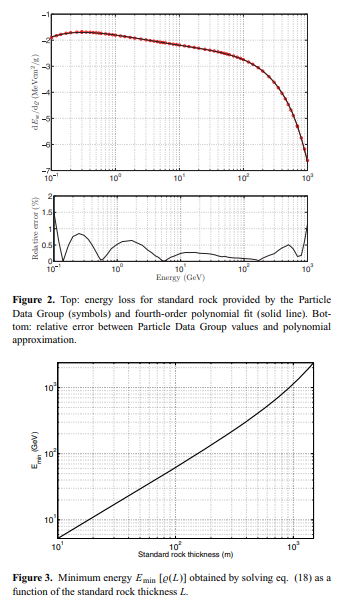

**Dados tabelados PDG**

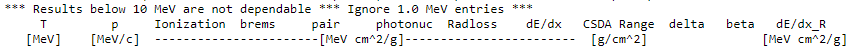

* **T**: Representa a energia.  **[MeV]**
* **p**: Indica o momento.  **[MeV/c]**


* **Ionization**: Refere-se à ionização, que é a remoção de elétrons de um átomo ou molécula. **[MeV cm^2/g]**

    * brems: Corresponde à perda de energia por frenagem, que ocorre quando uma partícula carregada desacelera ao atravessar um meio material. [MeV cm^2/g]
    * pair: Indica a perda de energia por produção de pares, que é o processo pelo qual um fóton de alta energia se converte em um par de partículas (um elétron e um pósitron). [MeV cm^2/g]
    * photonuc: Refere-se à perda de energia por reações nucleares induzidas por fótons. [MeV cm^2/g]
    * Radloss: Indica a perda total de energia por radiação. [MeV cm^2/g]
    * **dE/dx**: Representa a taxa de perda de energia por unidade de distância percorrida pela partícula carregada. **[MeV cm^2/g]**
    

* **CSDA Range**: Refere-se à faixa CSDA (Continuous Slowing Down Approximation), que é a distância média percorrida por uma partícula carregada até que sua energia seja reduzida a zero. **[g/cm^2]** 


* delta: Indica o valor delta (Δ) relacionado ao poder de parada da partícula.
* beta: Representa o valor beta (β) relacionado ao poder de parada da partícula.

* dE/dx_R: Refere-se à taxa de perda de energia restrita por unidade de distância percorrida pela partícula carregada. [MeV cm^2/g]

Ref.: Groom, D. E. et al., 2001. Tables, 78(2), 183- 356 

Disponível em: <https://pdg.lbl.gov/2014/AtomicNuclearProperties/adndt.pdf> e 
<https://pdg.lbl.gov/2023/AtomicNuclearProperties/MUE/muE_standard_rock.txt>

In [5]:
#Table of muon dE/dx and Range:
##              [MeV], [MeV/c],   --------------[MeV cm^2/g]----------------------------    [g/cm^2]   ----------------  [MeV cm^2/g]
#column_names = ['T', 'p', 'Ionization', 'brems', 'pair', 'photonuc', 'Radloss', 'dE/dx', 'CSDA Range', 'delta', 'beta', 'dE/dx_R']

url = 'https://pdg.lbl.gov/2020/AtomicNuclearProperties/MUE/muE_standard_rock.txt'
column_names = ['T', 'p', 'Ionization', 'brems', 'pair', 'photonuc', 'Radloss', 'dE/dx', 'CSDA Range', 'delta', 'beta', 'dE/dx_R']
PDG_muE_2020 = pd.read_csv(url, sep='\s+', skiprows=10, names=column_names)

url = 'https://pdg.lbl.gov/2021/AtomicNuclearProperties/MUE/muE_standard_rock.txt'
column_names = ['T', 'p', 'Ionization', 'brems', 'pair', 'photonuc', 'Radloss', 'dE/dx', 'CSDA Range', 'delta', 'beta', 'dE/dx_R']
PDG_muE_2021 = pd.read_csv(url, sep='\s+', skiprows=10, names=column_names)

url = 'https://pdg.lbl.gov/2022/AtomicNuclearProperties/MUE/muE_standard_rock.txt'
column_names = ['T', 'p', 'Ionization', 'brems', 'pair', 'photonuc', 'Radloss', 'dE/dx', 'CSDA Range', 'delta', 'beta', 'dE/dx_R']
PDG_muE_2022 = pd.read_csv(url, sep='\s+', skiprows=10, names=column_names)

url = 'https://pdg.lbl.gov/2023/AtomicNuclearProperties/MUE/muE_standard_rock.txt'
column_names = ['T', 'p', 'Ionization', 'brems', 'pair', 'photonuc', 'Radloss', 'dE/dx', 'CSDA Range', 'delta', 'beta', 'dE/dx_R']
PDG_muE_2023 = pd.read_csv(url, sep='\s+', skiprows=10, names=column_names)

In [6]:
#A tabela do PDG está disponível em um espectro de Energia maior do que o nosso definido.
#Por esse motivo, fazemos o filtro da tabela, para coincidir com os nossos limites.
PDG_muE_2020 = PDG_muE_2020[(PDG_muE_2020['T']/1e3 >= E.min()) & (PDG_muE_2020['T']/1e3 <= E.max())]
PDG_muE_2021 = PDG_muE_2021[(PDG_muE_2021['T']/1e3 >= E.min()) & (PDG_muE_2021['T']/1e3 <= E.max())]
PDG_muE_2022 = PDG_muE_2022[(PDG_muE_2022['T']/1e3 >= E.min()) & (PDG_muE_2022['T']/1e3 <= E.max())]
PDG_muE_2023 = PDG_muE_2023[(PDG_muE_2023['T']/1e3 >= E.min()) & (PDG_muE_2023['T']/1e3 <= E.max())]

PDG_muE_2020 = PDG_muE_2020.reset_index()
PDG_muE_2021 = PDG_muE_2021.reset_index()
PDG_muE_2022 = PDG_muE_2022.reset_index()
PDG_muE_2023 = PDG_muE_2023.reset_index()

In [7]:
PDG_E = PDG_muE_2023['T']          # Energia em [MeV]
PDG_dEdx = PDG_muE_2023['dE/dx']   # Taxa de perda de energia[MeV cm^2/g]



In [8]:
#Conferindo os dados e respectivas unidades
print("Energia PDG: mínima",PDG_E.min(),"MeV e máxima", PDG_E.max(), "MeV") #em MeV - padrão PDG
print("Energia PDG: mínima",PDG_E.min()/1e3,"GeV e máxima", PDG_E.max()/1e3, "GeV")  #em GeV  - convertido desde MeV
print("Espectro definido:", E.min(),"GeV a", E.max(), "GeV") #GeV definido por usuário
# PDG_E_GeV = PDG_muE_2023['T']/1e3 #ESTÁ EM MeV, é preciso '/1e3' para convertar pra GeV
# PDG_E_GeV.min(), PDG_E_GeV.max()

Energia PDG: mínima 10.0 MeV e máxima 1000000.0 MeV
Energia PDG: mínima 0.01 GeV e máxima 1000.0 GeV
Espectro definido: 0.01 GeV a 1000.0 GeV


C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


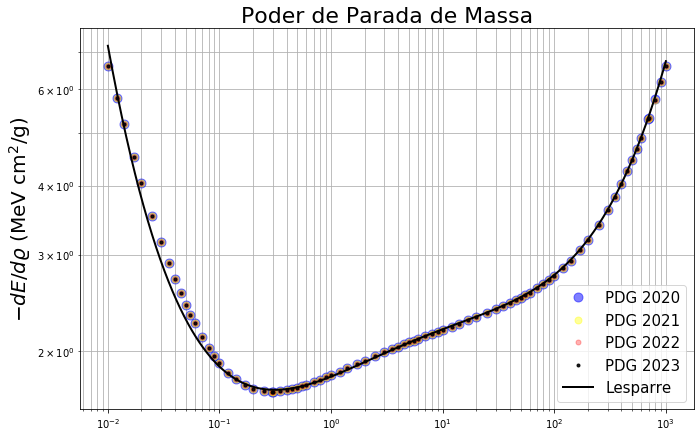

In [9]:
# Figura 1
plt.figure(figsize=(11, 7))  #11,7
plt.loglog(PDG_muE_2020['T']/1e3, PDG_muE_2020['dE/dx'], 'o', color='b', alpha=0.5, label='PDG 2020', markersize=9)
plt.loglog(PDG_muE_2021['T']/1e3, PDG_muE_2021['dE/dx'], 'o', color='yellow', alpha=0.4, label='PDG 2021', markersize=7)
plt.loglog(PDG_muE_2022['T']/1e3, PDG_muE_2022['dE/dx'], 'o', color='r', alpha=0.3, label='PDG 2022', markersize=5)
plt.loglog(PDG_muE_2023['T']/1e3, PDG_muE_2023['dE/dx'], 'o', color='k', alpha=0.9, label='PDG 2023', markersize=3)
plt.loglog(E, -dEdp, '-k', linewidth = 2, label = 'Lesparre')
#plt.loglog(E/1e3, dEdp_fit, 'g', linewidth = 2, label = 'Ajuste do Modelo com  PDG')   # !!!!!!! o códugo muysc n estava convertido *1e3

plt.ylabel(r"$-dE/d\varrho$ (MeV cm$^2$/g)", fontsize=20)
plt.title("Poder de Parada de Massa", fontsize=22)

#plt.xlim(1e-1, 1e3)
#plt.xlim(1e-2, 1e3)
#plt.ylim(1, 1e1)

plt.legend(loc='best', fontsize=15)
#plt.gca().invert_yaxis()
plt.grid(which='both', axis='both')
plt.show()

Cálculo do erro relativo entre os dados modelados pela equação de Lesparre com os dados tabelados do PDG.

Erro relativo calculado.


C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


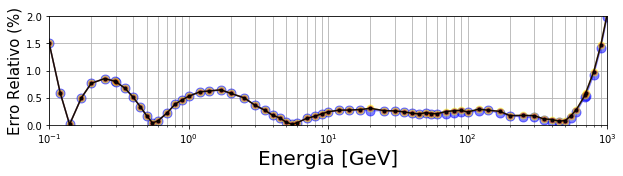

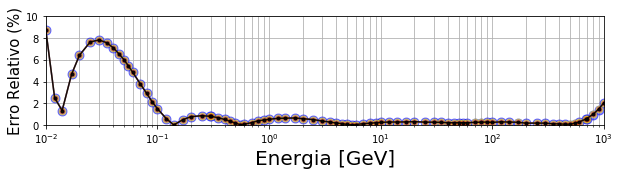

In [10]:
# Função para calcular o erro
def get_error(PDG_muE):
    N = len(PDG_muE['T'])
    error = np.zeros(N)
    l0 = 0.2549
    l1 = 0.0801
    l2 = 0.0368
    l3 = -0.0461
    l4 = 0.0154
    for i in range(N):
        y = np.log10(PDG_muE['T'][i]/1e3)  #E em PDG está em MeV e é preciso converter 
                                           #pra GeV (a eq de Lesparre usa em GeV)
        Model = -10**((l4*y**4) + (l3*y**3) + (l2*y**2) + l1*y + l0)
        error[i] = np.abs(100*(PDG_muE['dE/dx'][i] + Model)/PDG_muE['dE/dx'][i])
    return error

#Dataframes a serem utilizados para avaliar o erro relativo
#Vamos avaliar os dados de quatro anos: 2020,, 2021, 2022, 2023.
dataframes = [PDG_muE_2020, PDG_muE_2021, PDG_muE_2022, PDG_muE_2023]
labels = ['PDG data 2020', 'PDG data 2021', 'PDG data 2022', 'PDG data 2023']

# Cálculo dos erros
errors = [get_error(df) for df in dataframes]
print("Erro relativo calculado.")

fig = plt.figure(figsize=(10, 2))
plt.semilogx(PDG_muE_2020['T']/1e3, errors[0], marker='o', color='b', alpha=0.5,markersize=9, label=labels[0])
plt.semilogx(PDG_muE_2021['T']/1e3, errors[1], marker='o', color='yellow', alpha=0.4, markersize=7, label=labels[1])
plt.semilogx(PDG_muE_2022['T']/1e3, errors[2], marker='o', color='r', alpha=0.3, markersize=5, label=labels[2])
plt.semilogx(PDG_muE_2023['T']/1e3, errors[3], marker='o', color='k', alpha=0.9,markersize=3, label=labels[3])

plt.xlabel("Energia [GeV]", fontsize=20)
plt.ylabel("Erro Relativo (%)", fontsize=15)
plt.grid(which='both', axis='both')
plt.axis([1e-2, 1e3, 0, 10])
#plt.gca().invert_yaxis()

# Zoom no eixo x entre 10^1 e 10^2
plt.xlim(1e-1, 1e3)
plt.ylim(0, 2)
#plt.savefig(path+'plot4.png')

plt.show()

fig = plt.figure(figsize=(10, 2))
plt.semilogx(PDG_muE_2020['T']/1e3, errors[0], marker='o', color='b', alpha=0.5,markersize=9, label=labels[0])
plt.semilogx(PDG_muE_2021['T']/1e3, errors[1], marker='o', color='yellow', alpha=0.4, markersize=7, label=labels[1])
plt.semilogx(PDG_muE_2022['T']/1e3, errors[2], marker='o', color='r', alpha=0.3, markersize=5, label=labels[2])
plt.semilogx(PDG_muE_2023['T']/1e3, errors[3], marker='o', color='k', alpha=0.9,markersize=3, label=labels[3])

plt.xlabel("Energia [GeV]", fontsize=20)
plt.ylabel("Erro Relativo (%)", fontsize=15)
plt.grid(which='both', axis='both')
plt.axis([1e-2, 1e3, 0, 10])
#plt.gca().invert_yaxis()

# Zoom no eixo x entre 10^1 e 10^2
plt.xlim(1e-2, 1e3)
#plt.savefig(path+'plot4.png')

plt.show()

In [11]:
#Opacidade - em função do espectro de energia e do modelo de perda de energia
#Op [g/cm-²] = -E[MeV] / dEdp [MeV cm²/g] 

Op = -E*1e3/dEdp  
#conferindo unidades:
# g/cm² = -[Gev]*1e3 / [Mev cm-²/g]
# g/cm² = -[MeV] /  [Mev cm-²/g]
# g/cm² = - 1 /  [cm-²/g]

In [18]:
#nao encontrei opacidade na coluna da tabela, qual coluna releferia-se à opacidade.
#há coluna com unidade g/cm², mas ao plotar nao condiz com o esperado da curva da Opacidade.
#então, fiz o cálculo com as colunas que sei que representam as variaveis na equaçao para o cálculo da opacidade.
#Opacidade = - Energia em MeV dividido pela Mass stopping power em [MeV cm²/g]  
## -> pode ser aqui, nessa opacidade, que o valor da nossa curva diferencia.
#A Energia do PDG já está em MeV, por esse motivo não há necessidade de conversão.
# Opacidade [g/cm²] = - E [MeV] / dEdx [MeV cm²/g] 
#PDG_op = (PDG_E)/ PDG_muE_2023['dE/dx']  #cm²/g = [MeV] / [MeV/cm-²g-1]

PDG_op0 = (PDG_E)/ PDG_muE_2020['dE/dx']  #cm²/g = [MeV] / [MeV/cm-²g-1]
PDG_op1 = (PDG_E)/ PDG_muE_2021['dE/dx']  #cm²/g = [MeV] / [MeV/cm-²g-1]
PDG_op2 = (PDG_E)/ PDG_muE_2022['dE/dx']  #cm²/g = [MeV] / [MeV/cm-²g-1]

PDG_op = (PDG_E)/ PDG_muE_2023['dE/dx']  #cm²/g = [MeV] / [MeV/cm-²g-1]

C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


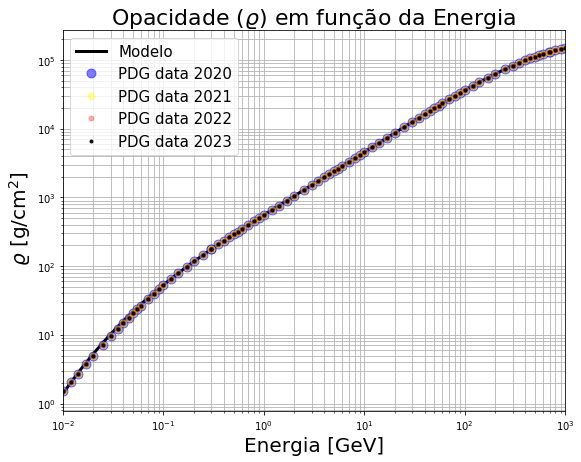

In [22]:
#Figura 5:
#opacidade com limite de plot no grid
plt.figure(figsize=(9, 7))
#plt.loglog(data[:,0]/1e3, data[:,2], 'or', label = 'Lechmann data')   #MeV pra GeV
#plt.plot(Groom[:,0]/1e3, Groom[:,2], 'ob', label = 'Groom data')
plt.loglog(E, Op, 'k', linewidth=3, label='Modelo')#: $\varrho$  = \frac{-E*1e3}{dEdp}') Gev, Gev pra Mev
#plt.loglog(E, Op_fit, 'k', linewidth=2, label='Modelo')#: $\varrho$  = \frac{-E*1e3}{dEdp}')
#plt.loglog(PDG_E/1e3 , PDG_op, marker='o', color='b', alpha=0.9,markersize=3, label = 'PDG 23')  #GeV convertido desde Mev/1e3 e g/cm²
plt.loglog(PDG_E/1e3 , PDG_op0,  marker='o', color='b', alpha=0.5,markersize=9,label=labels[0], linestyle='None')
plt.loglog(PDG_E/1e3 , PDG_op1, marker='o', color='yellow', alpha=0.4, markersize=7, label=labels[1], linestyle='None')
plt.loglog(PDG_E/1e3 , PDG_op2,  marker='o', color='r', alpha=0.3, markersize=5, label=labels[2], linestyle='None')
plt.loglog(PDG_E/1e3 , PDG_op, marker='o', color='k', alpha=0.9,markersize=3, label=labels[3], linestyle='None')



plt.ylabel(r" $ \varrho $ [g/cm$^2$]", fontsize=20) #p
plt.xlabel("Energia [GeV]", fontsize = 20)

plt.title(r"Opacidade ($ \varrho $) em função da Energia", fontsize=22)
plt.xlim(1e-2, 1e3)
#plt.ylim(1e1)# 1e1)
#plt.legend(loc='upper right', fontsize=15)
plt.legend(loc=2, fontsize=15)

plt.grid(which='both', axis='both')
plt.show()

Na prática, $\varrho$  é frequentemente expresso em $hg~cm^{−2}$, uma unidade física que corresponde a 1 m equivalente de água (m w.e.). Outra unidade útil é $2,65~hg~cm^{-2}$, que corresponde a metros equivalentes de rocha padrão ($m~s.r.e.$), conforme definido pelo Particle Data Group (por exemplo, Kudryavtsev 2009) e usado na Fig. 6 nesse caderno.

Ref. : https://insu.hal.science/insu-00814387/document

In [22]:
# #Opacidade em função da energia
# #sem limite de plot no grid
# fig = plt.figure(figsize=(4, 3))
# # plt.loglog(E, Op, 'k', linewidth = 2, label = 'Modelo')  #Gev e g/cm³
# # #plt.(PDG_muE_2023['T']/1e3, PDG_muE_2023['CSDA Range'], 'ob', label = 'CSDA Range') #GeV convertido desde Mev/1e3 e g/cm²
# # plt.loglog(PDG_E/1e3 , PDG_op, 'b', linewidth = 1, label = 'PDG 23')  #GeV convertido desde Mev/1e3 e g/cm²
# # #plt.plot(data[:,0]/1e3, data[:,0]/data[:,1], 'r')
# plt.loglog(E, Op, 'k', linewidth=3, label='Modelo')#: $\varrho$  = \frac{-E*1e3}{dEdp}') Gev, Gev pra Mev
# plt.loglog(PDG_E_20/1e3 , PDG_op_20, 'b', alpha=0.7, linewidth = 1.2, label = 'PDG 2020')  #GeV convertido desde Mev/1e3 e g/cm²
# plt.loglog(PDG_E_21/1e3 , PDG_op_21, 'yellow', alpha=0.6, linewidth = 1.4, label = 'PDG 2021')  #GeV convertido desde Mev/1e3 e g/cm²
# plt.loglog(PDG_E_22/1e3 , PDG_op_22, 'r', alpha=0.5, linewidth = 1.6, label = 'PDG 2022')  #GeV convertido desde Mev/1e3 e g/cm²
# plt.loglog(PDG_E_23/1e3 , PDG_op_23, color='cyan', alpha=0.6, linewidth = 1.8, label = 'PDG 2023')  #GeV convertido desde Mev/1e3 e g/cm²

# plt.xlabel("Energy [GeV]", fontsize = 20)
# plt.ylabel(r"$\varrho$ [g/cm$^2$]", fontsize = 20)
# plt.legend(fontsize=15)
# plt.grid(which='both', axis='both')
# #plt.axis([1e-2, 1e3,1,1e1])
# plt.show()

In [6]:
#Dataframe com as informações dos parâmetros físicos de cada rocha estudada. Grupos: sedimentar e ígnea
#Ref.: https://se.copernicus.org/articles/9/1517/2018/se-9-1517-2018.pdf

rock_types = ['Standard rock', 'Granite/Rhyolite', 'Andesite/Diorite', 'Gabbro/Basalt', 'Peridotite', 'Arkose', 'Arenite (Sandstone)', 'Shale', 'Limestone', 'Dolomite', 'Aragonite']
tipos_rochas = ['Rocha padrão', 'Granito/Riolito', 'Andesito/Diorito', 'Gabro/Basalto', 'Peridotito', 'Arkose', 'Arenito', 'Folhelho', 'Calcário', 'Dolomita', 'Aragonita']

rock_density = [2.650, 2.652, 2.812, 3.156, 3.340, 2.347, 2.357, 2.512, 2.711, 2.860, 2.939]
z_a = [0.5000, 0.4966, 0.4960, 0.4945, 0.4955, 0.4980, 0.4993, 0.4994, 0.4996, 0.4989, 0.4996]
z2_a = [5.500, 5.650, 5.803, 6.238, 5.790, 5.563, 5.392, 5.385, 6.275, 5.423, 6.275]
z2_a_ratio = [11.0, 11.38, 11.70, 12.62, 11.69, 11.17, 10.80, 10.78, 12.56, 10.87, 12.56]
i_value = [136.40, 145.27, 147.77, 154.91, 149.98, 143.73, 141.04, 139.09, 136.40, 127.65, 136.40]
rock_data = {'Rocha': rock_types, 'Densidade': rock_density, '{Z/A}': z_a, '{Z²/A}': z2_a, '{Z²/A}/{Z/A}': z2_a_ratio, '{I}': i_value}
df = pd.DataFrame(rock_data)
#print(df.head)


# #rho = 2.65 # g/cm3
# rho_are = df['Densidade'][6]   #2.357 g/cm³
# rho_std = df['Densidade'][0]   #2.650 g/cm³
# rho_gab = df['Densidade'][3]   #3.156 g/cm³

# rho_shale = df['Densidade'][7] #2.512 g/cm³ limiar inferior de diferença de densidade p detecção? 5% 0.05*2.65 = 0.1325
#                                #2.65-0.1325, 0.1325+2.65 = (2.5175, 2.7824999999999998)
# rho_lime = df['Densidade'][8]  #2.711 g/cm³ limiar superior de diferença de densidade p detecção? 5% 0.05*2.65 = 0.1325

# print(f"Definidos: \nrho_are:   {rho_are} g/cm³, \nrho_shale: {rho_shale} g/cm³, \nrho_std:   {rho_std}  g/cm³, \nrho_lime:  {rho_lime} g/cm³, \nrho_gab:   {rho_gab} g/cm³.")
# rho= [rho_are, rho_shale, rho_std, rho_lime, rho_gab] # = [2.357, 2.512, 2.65, 2.711, 3.156]

In [7]:
rho_std = df['Densidade'][0]   #2.650 g/cm³

#ígneas
rho_gran_ryo = df['Densidade'][1]
rho_andesito_diorite = df['Densidade'][2]
rho_gab = df['Densidade'][3]   #3.156 g/cm³
rho_peridotito = df['Densidade'][4]
rho_arkose = df['Densidade'][5]

#sedimentares
#rho = 2.65 # g/cm3
rho_are = df['Densidade'][6]   #2.357 g/cm³
rho_shale = df['Densidade'][7] #2.512 g/cm³ limiar inferior de diferença de densidade p detecção? 5% 0.05*2.65 = 0.1325
rho_lime = df['Densidade'][8]  #2.711 g/cm³ limiar superior de diferença de densidade p detecção? 5% 0.05*2.65 = 0.1325
rho_dolomite = df['Densidade'][9]
rho_aragonite = df['Densidade'][10]

rho= rock_density 

In [9]:
# [cm] = [g/cm²] / [g/cm³]
L_std  = Op / rho_std  
L_are  = Op / rho_are
L_gab  = Op / rho_gab
L_shale= Op / rho_shale
L_lime = Op / rho_lime

# [cm] = [g/cm²] / [g/cm³]
L_gran_ryo   = Op / rho_gran_ryo  
L_andesito_diorite  = Op / rho_andesito_diorite
L_peridotito = Op / rho_peridotito
L_arkose = Op / rho_arkose
L_dolomite = Op / rho_dolomite
L_aragonite = Op / rho_aragonite

Problemão. A tradução da litologia. 
shale: folhelho ou xisto?
limestone: calcário e não folhelho.

In [10]:
rho= [rho_are, rho_shale, rho_std, rho_lime, rho_gab] # = [2.357, 2.512, 2.65, 2.711, 3.156]
tipos_rochas = ['Arenito','Folhelho', 'Rocha padrão', 'Calcário', 'Gabro/Basalto']
#comprimentos = [L_std, L_are, L_gab, L_shale, L_lime, L_gran_ryo, L_andesito_diorite,L_peridotito, L_arkose, L_dolomite,L_aragonite ]  #arenito, xisto, padrão, folhelho, gabro
comprimentos = [L_are, L_shale, L_std, L_lime, L_gab ]  #arenito, xisto, padrão, folhelho, gabro

In [11]:

inicio_comprimento = [dados[0] for dados in comprimentos]
final_comprimento = [dados[-1] for dados in comprimentos]

menor_valor = [min(dados) for dados in comprimentos]
maior_valor = [max(dados) for dados in comprimentos]

std_valor = [np.std(dados) for dados in comprimentos]
media_valor = [np.mean(dados) for dados in comprimentos]


In [12]:
# Convertendo de cm para metros (dividindo por 100) e imprimindo com duas casas decimais

inicio_comprimento_metros = [valor / 100 for valor in inicio_comprimento]
final_comprimento_metros = [valor / 100 for valor in final_comprimento]
menor_valor_metros = [valor / 100 for valor in menor_valor]
maior_valor_metros = [valor / 100 for valor in maior_valor]
std_valor_metros = [valor / 100 for valor in std_valor]
media_valor_metros = [valor / 100 for valor in media_valor]
print(tipos_rochas)
print("Início Comprimento:", ["{:.2f}".format(valor) for valor in inicio_comprimento_metros], "metros.")
print("Final Comprimento:", ["{:.2f}".format(valor) for valor in final_comprimento_metros], "metros.")
print("\nMenor Valor:", ["{:.2f}".format(valor) for valor in menor_valor_metros], "metros.")
print("Maior Valor:", ["{:.2f}".format(valor) for valor in maior_valor_metros], "metros.")
print("\nDesvio Padrão:", ["{:.2f}".format(valor) for valor in std_valor_metros], "metros.")
print("Média:", ["{:.2f}".format(valor) for valor in media_valor_metros], "metros.")

['Arenito', 'Folhelho', 'Rocha padrão', 'Calcário', 'Gabro/Basalto']
Início Comprimento: ['0.01', '0.01', '0.01', '0.01', '0.00'] metros.
Final Comprimento: ['628.84', '590.04', '559.31', '546.73', '469.64'] metros.

Menor Valor: ['0.01', '0.01', '0.01', '0.01', '0.00'] metros.
Maior Valor: ['628.84', '590.04', '559.31', '546.73', '469.64'] metros.

Desvio Padrão: ['170.05', '159.56', '151.25', '147.85', '127.00'] metros.
Média: ['426.50', '400.18', '379.34', '370.81', '318.52'] metros.


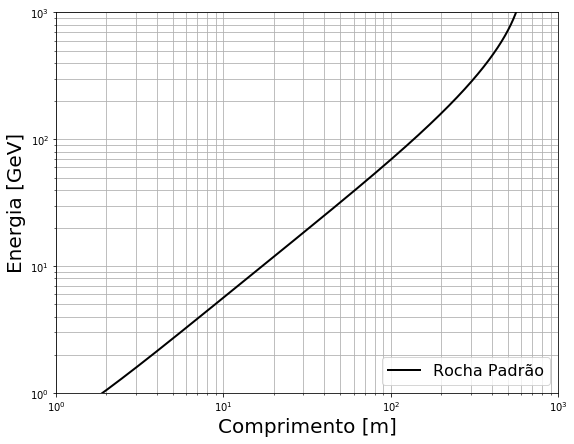

In [249]:
#Comprimento de percurso convertido para metro ao dividir L em cm/100
fig = plt.figure(figsize=(9, 7))
plt.loglog(L_std/100.0, E_tot, linewidth=2, c='k', label='Rocha Padrão')
#plt.loglog(L/100.0, E + Eu, 'k', linewidth = 2, label = 'Modelo')  #[cm] convertido pra [m], [GeV]
#plt.loglog(L_PDG/100.0, E + Eu, 'k', linewidth = 2)
#plt.title('Comprimento de trajeto em função de energia', fontsize=22)
plt.legend(fontsize=16, loc='lower right')
plt.xlabel("Comprimento [m]", fontsize = 20) #Lenght
plt.ylabel("Energia [GeV]", fontsize = 20)
plt.grid(which='both', axis='both')
plt.axis([1,1e3,1,1e3])
#plt.axis([1e-2, 1e3,1,1e1])

plt.show()

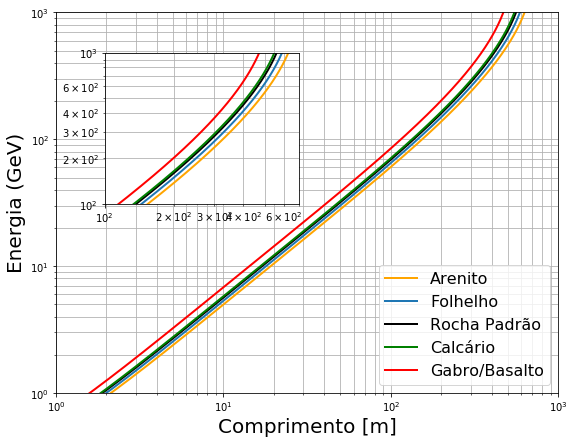

In [12]:
fig = plt.figure(figsize=(9, 7)) 
plt.loglog(L_are/100.0, E_tot, linewidth=2, c='orange', label='Arenito')
plt.loglog(L_shale/100.0, E_tot, linewidth = 2, label='Folhelho')
plt.loglog(L_std/100.0, E_tot, linewidth=2, c='k', label='Rocha Padrão')
plt.loglog(L_lime/100.0, E_tot,'g', linewidth = 2,label='Calcário')
plt.loglog(L_gab/100.0, E_tot, linewidth=2, c='r', label='Gabro/Basalto')
#plt.title('Comprimento de trajeto em função de energia', fontsize=22)
plt.xlabel("Comprimento [m]", fontsize = 20) #Lenght
plt.ylabel('Energia (GeV)', fontsize=20)
plt.legend(fontsize=16, loc='lower right')
plt.grid(which='both', axis='both')
plt.axis([1, 1e3, 1, 1e3])  #xmin xmax ymin ymax) lesparre

plt.axes([0.2, 0.5, 0.3, 0.3])
plt.loglog(L_are/100.0, E_tot, c='orange', linewidth=2)
plt.loglog(L_shale/100.0, E_tot,  linewidth=2)
plt.loglog(L_std/100.0, E_tot, c='k', linewidth=2)
plt.loglog(L_lime/100.0, E_tot, c='g', linewidth=2)
plt.loglog(L_gab/100.0, E_tot, c='r', linewidth=2)
plt.xlim([1e2, 7e2]) #200,1000
plt.ylim([1e2, 1e3])
plt.grid(which='both', axis='both')
plt.show()

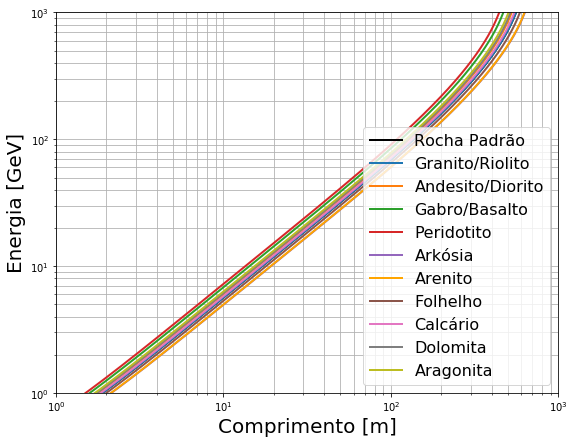

In [250]:
#Comprimento de percurso convertido para metro ao dividir L em cm/100
fig = plt.figure(figsize=(9, 7))
plt.loglog(L_std/100.0, E_tot, linewidth=2, c='k', label='Rocha Padrão')
plt.loglog(L_gran_ryo/100.0, E_tot, linewidth = 2, label='Granito/Riolito')
plt.loglog(L_andesito_diorite/100.0, E_tot, linewidth = 2, label='Andesito/Diorito')
plt.loglog(L_gab/100.0, E_tot, linewidth=2, label='Gabro/Basalto')
plt.loglog(L_peridotito/100.0, E_tot, linewidth = 2, label='Peridotito')
plt.loglog(L_arkose/100.0, E_tot, linewidth = 2, label='Arkósia')

plt.loglog(L_are/100.0, E_tot, linewidth=2, c='orange', label='Arenito')
plt.loglog(L_shale/100.0, E_tot, linewidth = 2, label='Folhelho')
plt.loglog(L_lime/100.0, E_tot, linewidth = 2,label='Calcário')
plt.loglog(L_dolomite/100.0, E_tot,linewidth = 2,label='Dolomita')
plt.loglog(L_aragonite/100.0, E_tot, linewidth = 2,label='Aragonita')
plt.legend(fontsize=16, loc='lower right')
plt.xlabel("Comprimento [m]", fontsize = 20) #Lenght
plt.ylabel("Energia [GeV]", fontsize = 20)
plt.grid(which='both', axis='both')
plt.axis([1,1e3,1,1e3])
#plt.axis([1e-2, 1e3,1,1e1])

plt.show()

In [13]:
Lm=[50,100,150,200,250,300,350,400,450,500,550,600,650,700] #L em metros
# Lm=[20,40,60,80,100,
#    120,140,160,180,200,
#    220,240,260,280,300,
#    320,340,360,380,400,
#    420,440,460,480,500,
#    520,540,560,580,600,
#    620,640,660,680,700]
#700,800,900] #de 100 em 100   np.arange(inicio, fim, passo)
#Lm_2=[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900] #de 50       

In [14]:
import sys
path = "C:/Users/steph/edit/TCC_Contagem_de_Muons_em_Espessuras_Rocha/"

sys.path.append(path) 

In [15]:
from importlib import reload
import modulo_funcoes

In [16]:
reload(modulo_funcoes)
from modulo_funcoes import calcula_Emin_pontual
#from modulo_funcoes import calcula_Emin_continuo

# L = Lm*1e2 # Lenght to cm
# p = L*rho # Opacity g/cm2

# Eminp = E[np.argmin((Op - p)**2)] - Eu/1e3 # Optimum value

res_1 = pd.DataFrame(columns=["Profundidade (m)", "Densidade (g/cm³)", "Energia Mínima (GeV)", "Opacidade (g/cm²)"])
print("Comprimento, Densidade, Opacidade, Energia Mínima" )
for l in Lm:
    for i in rho:
        Eminp,p = calcula_Emin_pontual(E, Eu, Op, i,l)
        data = {"Profundidade (m)": l, "Densidade (g/cm³)": i, "Energia Mínima (GeV)": Eminp, "Opacidade (g/cm²)": p}
        res_1 = pd.concat([res_1, pd.DataFrame([data])], ignore_index=True)
#res_2 = pd.DataFrame(columns=["Profundidade (m)", "Densidade (g/cm³)", "Energia Mínima (GeV)", "Opacidade (p)"])
      
# for l in Lm_2:
#     for i in rho:
#         Eminp_2,p_2 = calcula_Emin_pontual(i,l)
#         data_2 = {"Profundidade (m)": l, "Densidade (g/cm³)": i, "Energia Mínima (GeV)": Eminp_2, "Opacidade (p)": p_2}
#         res_2 = pd.concat([res_2, pd.DataFrame([data_2])], ignore_index=True)
        

Comprimento, Densidade, Opacidade, Energia Mínima


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
#Subdataframes agrupados por densidade:
from modulo_funcoes import separa_resultados

df_are = separa_resultados(res_1, rho_are)
df_lime = separa_resultados(res_1, rho_lime)
df_std = separa_resultados(res_1, rho_std)
df_shale = separa_resultados(res_1, rho_shale)
df_gab = separa_resultados(res_1, rho_gab)

dataframes = [df_are, df_shale, df_std, df_lime, df_gab]


In [18]:
df_std

,index,Profundidade (m),Densidade (g/cm³),Energia Mínima (GeV),Opacidade (g/cm²)
0,2,50,2.65,31.712425,13250.0
1,7,100,2.65,68.978356,26500.0
2,12,150,2.65,111.441536,39750.0
3,17,200,2.65,159.996855,53000.0
4,22,250,2.65,215.928201,66250.0
5,27,300,2.65,281.062957,79500.0
6,32,350,2.65,358.091594,92750.0
7,37,400,2.65,451.205072,106000.0
8,42,450,2.65,567.497721,119250.0
9,47,500,2.65,720.648405,132500.0


In [19]:
df_are

,index,Profundidade (m),Densidade (g/cm³),Energia Mínima (GeV),Opacidade (g/cm²)
0,0,50,2.357,27.886263,11785.0
1,5,100,2.357,60.314442,23570.0
2,10,150,2.357,96.732681,35355.0
3,15,200,2.357,137.699076,47140.0
4,20,250,2.357,184.002217,58925.0
5,25,300,2.357,236.713596,70710.0
6,30,350,2.357,297.314196,82495.0
7,35,400,2.357,367.921097,94280.0
8,40,450,2.357,451.711367,106065.0
9,45,500,2.357,553.793556,117850.0


In [20]:
df_lime

,index,Profundidade (m),Densidade (g/cm³),Energia Mínima (GeV),Opacidade (g/cm²)
0,3,50,2.711,32.516317,13555.0
1,8,100,2.711,70.813638,27110.0
2,13,150,2.711,114.586405,40665.0
3,18,200,2.711,164.815207,54220.0
4,23,250,2.711,222.914632,67775.0
5,28,300,2.711,290.918759,81330.0
6,33,350,2.711,371.868158,94885.0
7,38,400,2.711,470.596680,108440.0
8,43,450,2.711,595.541843,121995.0
9,48,500,2.711,763.815177,135550.0


In [21]:
df_shale

,index,Profundidade (m),Densidade (g/cm³),Energia Mínima (GeV),Opacidade (g/cm²)
0,1,50,2.512,29.903143,12560.0
1,6,100,2.512,64.866697,25120.0
2,11,150,2.512,104.433005,37680.0
3,16,200,2.512,149.323761,50240.0
4,21,250,2.512,200.564553,62800.0
5,26,300,2.512,259.582369,75360.0
6,31,350,2.512,328.413288,87920.0
7,36,400,2.512,410.095779,100480.0
8,41,450,2.512,509.466095,113040.0
9,46,500,2.512,634.996153,125600.0


In [22]:
df_gab

,index,Profundidade (m),Densidade (g/cm³),Energia Mínima (GeV),Opacidade (g/cm²)
0,4,50,3.156,38.455858,15780.0
1,9,100,3.156,84.540202,31560.0
2,14,150,3.156,138.437769,47340.0
3,19,200,3.156,201.964540,63120.0
4,24,250,3.156,277.880788,78900.0
5,29,300,3.156,370.526871,94680.0
6,34,350,3.156,487.275715,110460.0
7,39,400,3.156,642.344080,126240.0
8,44,450,3.156,870.187124,142020.0
9,49,500,3.156,999.894340,157800.0


In [23]:
# Integral do Fluxo
from modulo_funcoes import Fluxo_RB, Fluxo_RH, Fluxo_T
from modulo_funcoes import Fluxo_Gaisser, Fluxo_GML, Fluxo_GM
from modulo_funcoes import Fluxo_Tang, Fluxo_Tang_Lechmann
from modulo_funcoes import int_flux, gera_coluna_int


In [24]:
#Definiçao do ângulo theta em graus
cenith = 30 #angulo theta

#Definição do Espectro de Energia do Fluxo de Muons Incidentes
#E0=np.linspace(1E1, 1E4, 1E3) #energia do muon na superfície  {10,10000}  GeV
E0=np.linspace(1E0, 1E4, 1E4) #GeV #corsika E RANGE MUYSC 

C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [25]:
#Tratamento do ângulo em graus para radianos
angulo1 = cenith
theta   = np.radians(angulo1) # Conversão do ângulo zênite para radianos

#Estimativa dos fluxos Phi de muons incidentes
Fluxo_RB            = Fluxo_RB(theta,E0)             #'k'        ,label='Reyna/Bugaev',lw=2)
Fluxo_RH            = Fluxo_RH(theta,E0)             #'b'        ,label='Reyna/Hebbeker',lw=2)
Fluxo_T             = Fluxo_T(theta,E0)              #'r'        ,label='Tanaka',lw=2)
Fluxo_Gaisser       = Fluxo_Gaisser(theta, E0)       #'orangered',label='F_Gaisser',lw=2)
Fluxo_GML           = Fluxo_GML(theta,E0)            #'orange'   ,label='Gaisser/GML',lw=2)
Fluxo_GM            = Fluxo_GM(theta,E0)             #'hotpink'  ,label='Gaisser/MUSIC',lw=2)
Fluxo_Tang          = Fluxo_Tang(theta, E0)          #'purple'   ,label=' Gaisser/Tang',lw=2)
Fluxo_Tang_Lechmann = Fluxo_Tang_Lechmann(theta, E0) #'darkgreen',label=' Gaisser/Tang_Lechmann',lw=2) 

In [26]:
reload(modulo_funcoes)

from modulo_funcoes import plota_fluxo_integrado
from modulo_funcoes import plota_fluxo_integrado_profundidades
from modulo_funcoes import plota_fluxo_integrado_angulos
from modulo_funcoes import fluxos

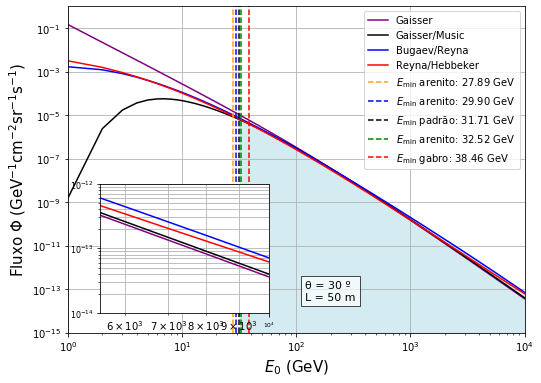

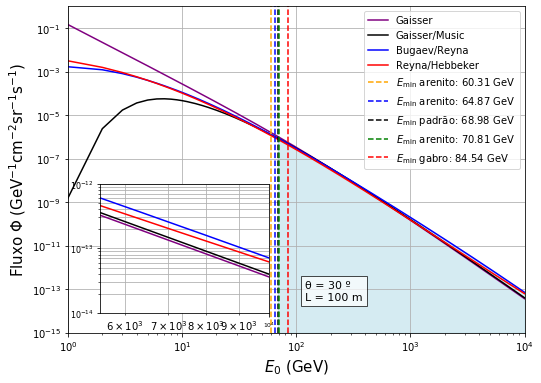

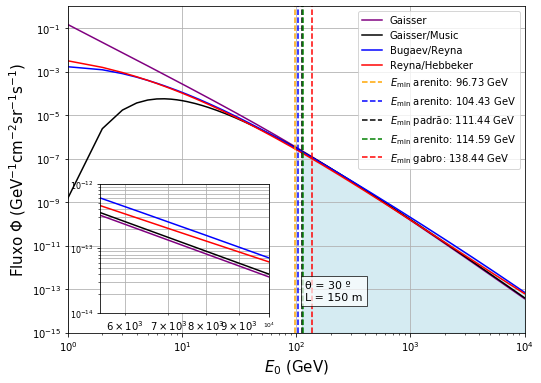

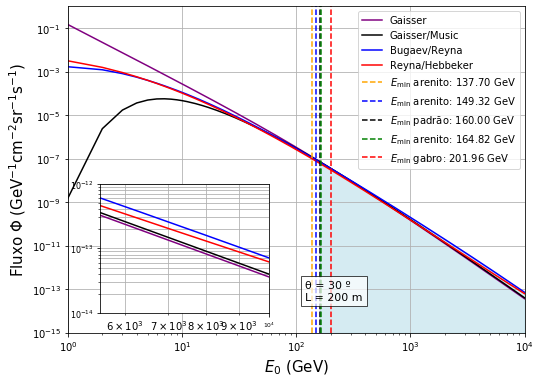

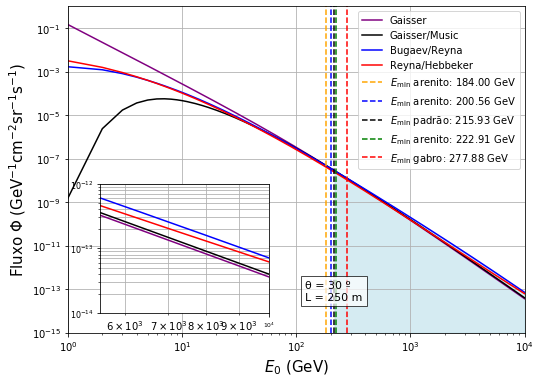

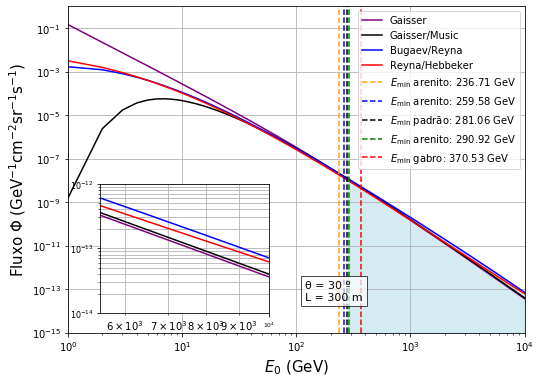

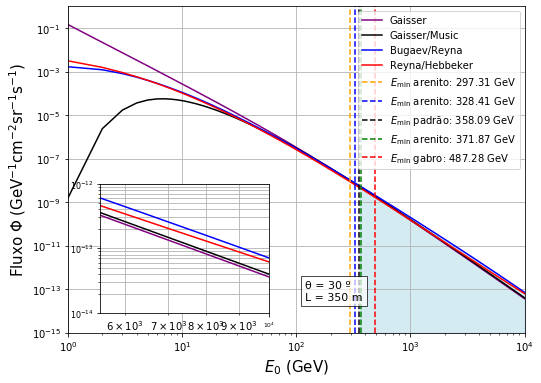

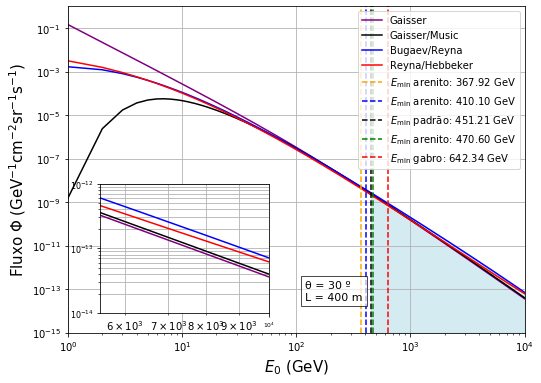

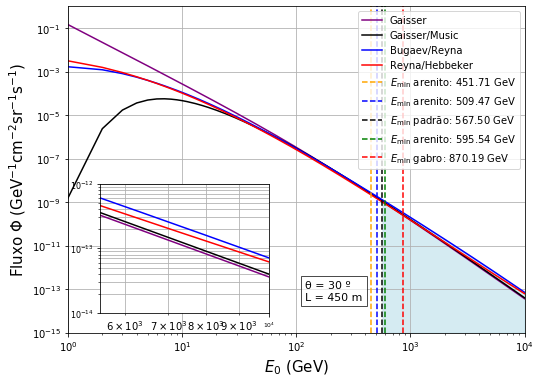

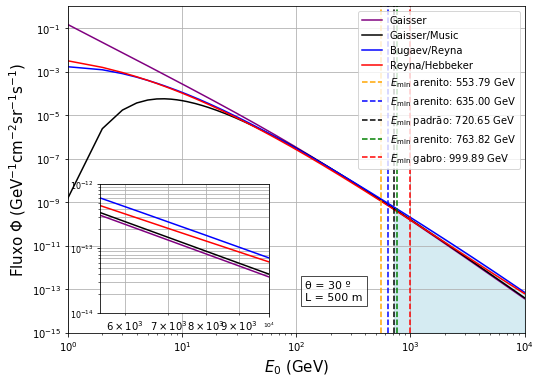

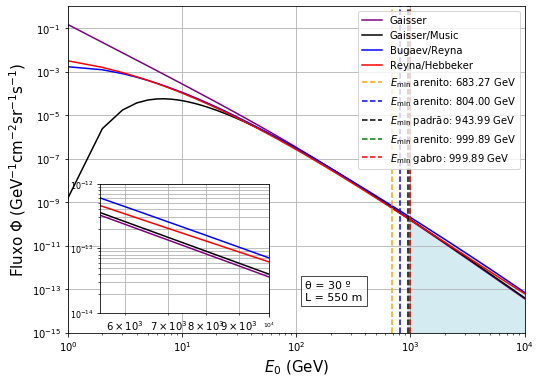

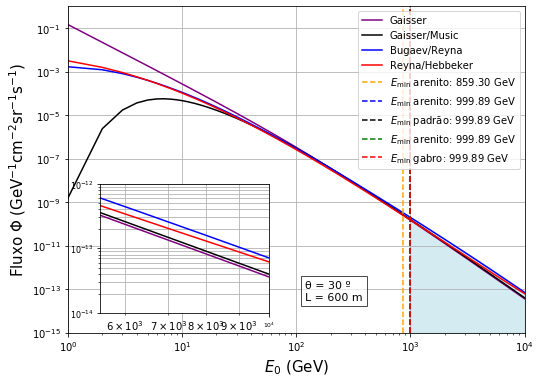

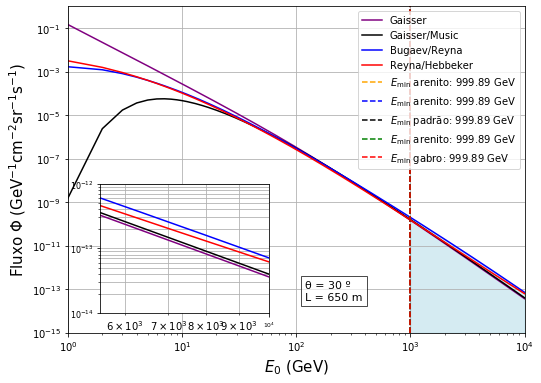

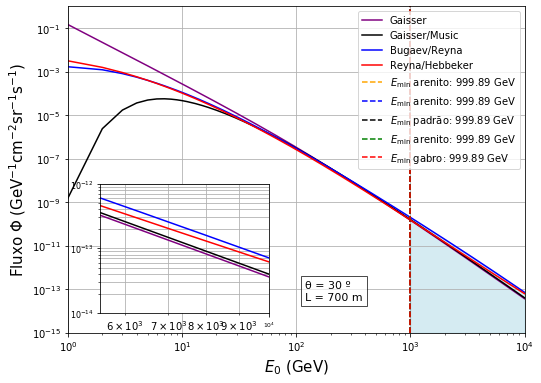

In [27]:
reload(modulo_funcoes)

from modulo_funcoes import plota_fluxo_integrado_zoom

for loc in range(len(df_std['Profundidade (m)'])):
    plota_fluxo_integrado_zoom(cenith, E0, Lm, Fluxo_Gaisser, Fluxo_GM, Fluxo_RB, Fluxo_RH, df_are,df_shale, df_std, df_lime, df_gab,loc, Fluxo_RB)

O fluxo integrado de múons [$\varrho$, $\theta$]:

que emerge após cruzar o meio denso é controlado pelo fluxo diferencial incidente, $\Phi_{0}$ ($cm^{−2}~ sr^{−1}~ s^{−1}~ GeV^{−1}$), e pela energia mínima, $E_{min}$ (GeV), necessário para um múon atravessar uma determinada quantidade de matéria $\varrho$ ($hg~cm^{−2}$)

In [31]:
#após estimados os fluxos de superfície incidentes, 
#calculamos a integral do fluxo onde a energia mínima de cada rocha é definida.

fluxos = [Fluxo_RB, Fluxo_Gaisser, Fluxo_Tang, Fluxo_Tang_Lechmann]
phi = fluxos[1] #Definido o Fluxo de Gaisser Phi_Bugaev_Reyna_45  #Phi_Gaisser_30 Phi_Tang_Lechmann  Phi_Gaisser

df_rho = [df_are, df_shale, df_std, df_lime, df_gab]
M = 10000 #10000  # Número de pontos
dE = (1e4 - 1e0) / M  # Intervalo de energia entre os pontos

 
df_are = gera_coluna_int(df_rho[0], E0, dE, phi)
df_shale = gera_coluna_int(df_rho[1], E0, dE, phi)
df_std = gera_coluna_int(df_rho[2], E0, dE, phi)
df_lime = gera_coluna_int(df_rho[3], E0, dE, phi)
df_gab = gera_coluna_int(df_rho[4], E0, dE, phi)

# Agora, df_rho foi atualizado com os valores de Int_fluxo e Superficie_fluxo

0/14
Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000221 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.795392 cm-2 sr-1 hour-1
Fluxo de muons transversal : 19.089399 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os impressos, estão multiplicados pelo número de segundos no dia.
1/14
Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000044 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.159909 cm-2 sr-1 hour-1
Fluxo de muons transversal : 3.837808 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os impressos, estão multiplicados pelo número de segundos no dia.
2/14
Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000016 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.058290 cm-2 sr-1 hour-1
Fluxo de muons transversal : 1.398959 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os imp

Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000000 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.000208 cm-2 sr-1 hour-1
Fluxo de muons transversal : 0.004997 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os impressos, estão multiplicados pelo número de segundos no dia.
0/14
Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000169 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.608408 cm-2 sr-1 hour-1
Fluxo de muons transversal : 14.601790 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os impressos, estão multiplicados pelo número de segundos no dia.
1/14
Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000034 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.122809 cm-2 sr-1 hour-1
Fluxo de muons transversal : 2.947418 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os impresso

Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000000 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.000414 cm-2 sr-1 hour-1
Fluxo de muons transversal : 0.009930 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os impressos, estão multiplicados pelo número de segundos no dia.
10/14
Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000000 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.000208 cm-2 sr-1 hour-1
Fluxo de muons transversal : 0.004997 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os impressos, estão multiplicados pelo número de segundos no dia.
11/14
Fluxo de muons a céu aberto : 668.674231 cm-2 sr-1 day-1
Fluxo de muons transversal : 0.000000 cm-2 sr-1 sec-1
Fluxo de muons transversal : 0.000208 cm-2 sr-1 hour-1
Fluxo de muons transversal : 0.004997 cm-2 sr-1 day-1
Valores de Int_fluxo e Superficie salvos sao para um segundo. Os impress

Integral [$\varrho$, $\theta$] sai em segundos. Aqui é feito a conversão para outras escalas temporais

In [33]:
from modulo_funcoes import tempo
#criação de colunas com integrais de fluxos referentes à intervalos de tempos definidos
# Int_fluxo_hora
# Int_fluxo_dia
# Int_fluxo_semana
# Int_fluxo_mes
# Int_fluxo_bimestre
# Int_fluxo_trimestre
# Int_fluxo_semestre
# Int_fluxo_ano
# #Phi_acima_Emin

df_are=tempo(df_are)
df_shale=tempo(df_shale)
df_rho=tempo(df_std)
df_lime=tempo(df_lime)
df_gab=tempo(df_gab)

In [34]:
df_std.columns

Index(['index', 'Profundidade (m)', 'Densidade (g/cm³)',
       'Energia Mínima (GeV)', 'Opacidade (g/cm²)', 'Int_fluxo',
       'Superficie_fluxo', 'Int_fluxo_hora', 'Int_fluxo_dia',
       'Int_fluxo_semana', 'Int_fluxo_mes', 'Int_fluxo_bimestre',
       'Int_fluxo_trimestre', 'Int_fluxo_semestre', 'Int_fluxo_ano'],
      dtype='object')

Aceitação (Ângulo sólido x Área de Detecção) da detecção

A aceitação quantifica a capacidade do telescópio de capturar um fluxo proveniente de um determinado ângulo sólido centrado em uma determinada direção.
A aceitação depende das características geométricas do telescópio

In [35]:
#aceitação
acceptance = 100 #cm^-2sr^-1 Lesparre

Viabilidade
A equação para condição de viabilidade permite definir o domínio de aplicabilidade da imagem de múons.
Uma questão importante é determinar as condições experimentais que devem ser satisfeitas para poder distinguir duas opacidades próximas, $\varrho_{0}$ e $\varrho_{0}+\delta \varrho$, ou, equivalentemente, fazer estatisticamente a diferença entre $N(\varrho_{0}$) e $N(\varrho_{0} + \delta \varrho)$.
Para isso, é útil estabelecer uma relação entre os dados, ou seja, o número, N, de múons registrados durante um determinado período de tempo, ΔT, a aceitação do telescópio, $\tau$ e o parâmetro físico $\varrho(L)$.
 
Lesparre et al. (2010) estabeleceram uma condição a ser satisfeita para distinguir uma variação $\delta\varrho$ através de um corpo geológico de opacidade $\varrho_{0}$ para uma dada aceitação do telescópio, $\tau$ , e duração de medição T.

Fórmula de viabilidade :  $ \Delta T \times \tau \times \frac{\Delta I^{2}(\varrho_{0},\delta\varrho)}{I(\varrho_{0})} > c $   . Estamos usando c=2

 $I^{2}$ é a variação do fluxo integrado causada pela variação da opacidade  $\delta\varrho$ dentro de um objeto de opacidade total  $\varrho_{0}$.
 
Através desta relação é possível testar a adequação do método para investigar a distribuição de densidade dentro de algumas estruturas alvo candidatas.

Usaremos a aceitação sendo $\tau = 100~cm^{-2}sr^{-1}$ em referencia ao trabalho de Lesparre et al (2010),
O valor escolhido para o termo c fixa o nível de confiança da resolução alcançada em  $\delta\varrho$. 
c = 2 correspondendo a um desvio padrão (ou seja, cerca de 68 por cento).

https://academic.oup.com/gji/article/183/3/1348/638804?login=false  (file:///C:/Users/steph/OneDrive/%C3%81rea%20de%20Trabalho/refs_tcc/artigos_trabalho/Lesparre_2010_Geophysical_muon_imaging_Feasibility_and_limits.pdf)

Ref.:Ref.: https://insu.hal.science/insu-00814387/document 


In [40]:
#não fazer n_Int_flux. 
df_std.columns

Index(['index', 'Profundidade (m)', 'Densidade (g/cm³)',
       'Energia Mínima (GeV)', 'Opacidade (g/cm²)', 'Int_fluxo',
       'Superficie_fluxo', 'Int_fluxo_hora', 'Int_fluxo_dia',
       'Int_fluxo_semana', 'Int_fluxo_mes', 'Int_fluxo_bimestre',
       'Int_fluxo_trimestre', 'Int_fluxo_semestre', 'Int_fluxo_ano'],
      dtype='object')

In [46]:
#passa função em lista de df
def viabilidade(df, var):
    tempo_ = []
    
    for posicao in range(len(df['Profundidade (m)'])):
#        print(posicao)
        _L         = df['Profundidade (m)'][posicao]  # m                      
        _rho       = df['Densidade (g/cm³)'][posicao] # gcm-3
        _opacidade = df['Opacidade (g/cm²)'][posicao]     # m s.r.e
        _I_por_dia_variacao = df[var][posicao] # cm-2sr-1dia-1 
        _I_por_dia_referencia = df_std[var][posicao] # cm-2sr-1dia-1 
        _theta     = cenith   # graus
        _aceitacao = acceptance   # cm2sr
        
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
        c = 2    #o proprio raiz de N  c = 2* np.sqrt(Numero_muons), se np.sqrt(N) = 1, então c = 2.

        tempo = c * _I_por_dia_referencia / _aceitacao / (_I_por_dia_referencia - _I_por_dia_variacao)**2
        
        tempo_formatado = "{:.3f}".format(tempo)
        opacidade_formatado = "{:.0f}".format(_opacidade)

        _I_por_dia_variacao_formatado = "{:.3f}".format(_I_por_dia_variacao)
        _I_por_dia_referencia_formatado = "{:.3f}".format(_I_por_dia_referencia)
        #× tempo
        print("Rho:", _rho,"g/cm³","L", _L,"m", "Tempo", tempo_formatado, "Tempo mínimo:",np.round(tempo),"Op", opacidade_formatado, "I Delta dia", _I_por_dia_variacao_formatado, "I Referencia Dia",_I_por_dia_referencia_formatado)

        
        tempo_.append(tempo_formatado) #para um segundo NAO ESTÁ ARREDONDADO

    df["Tempo"] = tempo_

    return df

In [47]:
dataframes = [df_are, df_shale, df_std, df_lime ,df_gab]
var = 'Int_fluxo_dia'

for df in dataframes:
    print("θ:", _theta,"º","Acc",_aceitacao,"cm-²Sr-¹")
    viabilidade(df,var)
    print("")

θ: 30 º Acc 100 cm-²Sr-¹
Rho: 2.357 g/cm³ L 50 m Tempo 0.015 Tempo mínimo: 0.0 Op 11785 I Delta dia 19.089 I Referencia Dia 14.602
Rho: 2.357 g/cm³ L 100 m Tempo 0.074 Tempo mínimo: 0.0 Op 23570 I Delta dia 3.838 I Referencia Dia 2.947
Rho: 2.357 g/cm³ L 150 m Tempo 0.137 Tempo mínimo: 0.0 Op 35355 I Delta dia 1.399 I Referencia Dia 1.014
Rho: 2.357 g/cm³ L 200 m Tempo 0.270 Tempo mínimo: 0.0 Op 47140 I Delta dia 0.631 I Referencia Dia 0.449
Rho: 2.357 g/cm³ L 250 m Tempo 0.463 Tempo mínimo: 0.0 Op 58925 I Delta dia 0.320 I Referencia Dia 0.222
Rho: 2.357 g/cm³ L 300 m Tempo 0.636 Tempo mínimo: 1.0 Op 70710 I Delta dia 0.178 I Referencia Dia 0.117
Rho: 2.357 g/cm³ L 350 m Tempo 0.931 Tempo mínimo: 1.0 Op 82495 I Delta dia 0.103 I Referencia Dia 0.065
Rho: 2.357 g/cm³ L 400 m Tempo 1.241 Tempo mínimo: 1.0 Op 94280 I Delta dia 0.061 I Referencia Dia 0.037
Rho: 2.357 g/cm³ L 450 m Tempo 1.624 Tempo mínimo: 2.0 Op 106065 I Delta dia 0.037 I Referencia Dia 0.021
Rho: 2.357 g/cm³ L 500 m Tem

C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


 2.512 g/cm³ L 650 m Tempo inf Tempo mínimo: inf Op 163280 I Delta dia 0.005 I Referencia Dia 0.005
Rho: 2.512 g/cm³ L 700 m Tempo inf Tempo mínimo: inf Op 175840 I Delta dia 0.005 I Referencia Dia 0.005

θ: 30 º Acc 100 cm-²Sr-¹
Rho: 2.65 g/cm³ L 50 m Tempo inf Tempo mínimo: inf Op 13250 I Delta dia 14.602 I Referencia Dia 14.602
Rho: 2.65 g/cm³ L 100 m Tempo inf Tempo mínimo: inf Op 26500 I Delta dia 2.947 I Referencia Dia 2.947
Rho: 2.65 g/cm³ L 150 m Tempo inf Tempo mínimo: inf Op 39750 I Delta dia 1.014 I Referencia Dia 1.014
Rho: 2.65 g/cm³ L 200 m Tempo inf Tempo mínimo: inf Op 53000 I Delta dia 0.449 I Referencia Dia 0.449
Rho: 2.65 g/cm³ L 250 m Tempo inf Tempo mínimo: inf Op 66250 I Delta dia 0.222 I Referencia Dia 0.222
Rho: 2.65 g/cm³ L 300 m Tempo inf Tempo mínimo: inf Op 79500 I Delta dia 0.117 I Referencia Dia 0.117
Rho: 2.65 g/cm³ L 350 m Tempo inf Tempo mínimo: inf Op 92750 I Delta dia 0.065 I Referencia Dia 0.065
Rho: 2.65 g/cm³ L 400 m Tempo inf Tempo mínimo: inf Op 

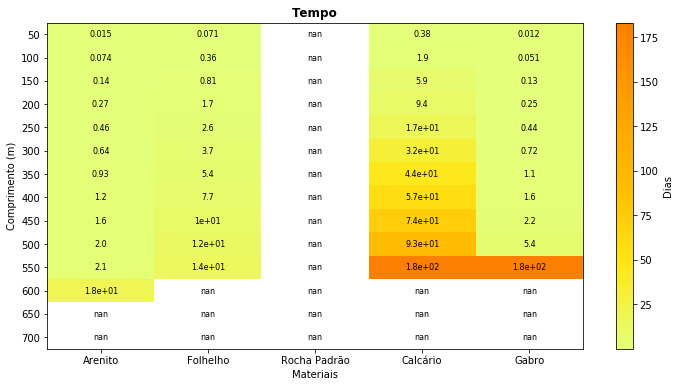

In [59]:
reload(modulo_funcoes)
from modulo_funcoes import mesh_dado

for df in (df_are, df_shale, df_std, df_lime, df_gab):
    df['Tempo'] = df['Tempo'].replace('inf', 'INDISTINGUÍVEL')
    df['Profundidade (m)'] = pd.to_numeric(df['Profundidade (m)'], errors='coerce')
    df['Tempo'] = pd.to_numeric(df['Tempo'], errors='coerce')
    
colunas = ['Tempo']

for coluna in colunas: 
    mesh_dado(coluna, df_are, df_shale, df_std, df_lime, df_gab)
#substituir 'inf' por 'INDISTINGUÍVEL' não deu certo, virou NaN


In [113]:
def calcular_ritmo_incremento(dataframes, coluna):
    for df in dataframes:
        diffs = df[coluna].diff().dropna()
        ritmo_medio = diffs.mean()
        print(f"Ritmo médio de incremento para na coluna '{coluna}': {ritmo_medio}")

# Supondo que dataframes seja uma lista contendo os dataframes df_are, df_shale, df_lime, df_gab
dataframes = [df_are, df_shale, df_lime, df_gab]
coluna = 'Tempo'

calcular_ritmo_incremento(dataframes, coluna)


Ritmo médio de incremento para na coluna 'Tempo': 0.058545454545454546
Ritmo médio de incremento para na coluna 'Tempo': 0.048799999999999996
Ritmo médio de incremento para na coluna 'Tempo': 0.6533
Ritmo médio de incremento para na coluna 'Tempo': 0.6546000000000001


θ: 30 º Acc 100 cm-²Sr-¹
Rho: 2.357 g/cm³ L 50 m Tempo 0.001 Tempo mínimo: 0.0 Op 11785 I Delta dia 534.503 I Referencia Dia 408.850
Rho: 2.357 g/cm³ L 100 m Tempo 0.003 Tempo mínimo: 0.0 Op 23570 I Delta dia 107.459 I Referencia Dia 82.528
Rho: 2.357 g/cm³ L 150 m Tempo 0.005 Tempo mínimo: 0.0 Op 35355 I Delta dia 39.171 I Referencia Dia 28.401
Rho: 2.357 g/cm³ L 200 m Tempo 0.010 Tempo mínimo: 0.0 Op 47140 I Delta dia 17.680 I Referencia Dia 12.574
Rho: 2.357 g/cm³ L 250 m Tempo 0.017 Tempo mínimo: 0.0 Op 58925 I Delta dia 8.964 I Referencia Dia 6.221
Rho: 2.357 g/cm³ L 300 m Tempo 0.023 Tempo mínimo: 0.0 Op 70710 I Delta dia 4.989 I Referencia Dia 3.288
Rho: 2.357 g/cm³ L 350 m Tempo 0.033 Tempo mínimo: 0.0 Op 82495 I Delta dia 2.877 I Referencia Dia 1.829
Rho: 2.357 g/cm³ L 400 m Tempo 0.044 Tempo mínimo: 0.0 Op 94280 I Delta dia 1.721 I Referencia Dia 1.037
Rho: 2.357 g/cm³ L 450 m Tempo 0.058 Tempo mínimo: 0.0 Op 106065 I Delta dia 1.037 I Referencia Dia 0.587
Rho: 2.357 g/cm³ L 

C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


 L 150 m Tempo inf Tempo mínimo: inf Op 39750 I Delta dia 28.401 I Referencia Dia 28.401
Rho: 2.65 g/cm³ L 200 m Tempo inf Tempo mínimo: inf Op 53000 I Delta dia 12.574 I Referencia Dia 12.574
Rho: 2.65 g/cm³ L 250 m Tempo inf Tempo mínimo: inf Op 66250 I Delta dia 6.221 I Referencia Dia 6.221
Rho: 2.65 g/cm³ L 300 m Tempo inf Tempo mínimo: inf Op 79500 I Delta dia 3.288 I Referencia Dia 3.288
Rho: 2.65 g/cm³ L 350 m Tempo inf Tempo mínimo: inf Op 92750 I Delta dia 1.829 I Referencia Dia 1.829
Rho: 2.65 g/cm³ L 400 m Tempo inf Tempo mínimo: inf Op 106000 I Delta dia 1.037 I Referencia Dia 1.037
Rho: 2.65 g/cm³ L 450 m Tempo inf Tempo mínimo: inf Op 119250 I Delta dia 0.587 I Referencia Dia 0.587
Rho: 2.65 g/cm³ L 500 m Tempo inf Tempo mínimo: inf Op 132500 I Delta dia 0.322 I Referencia Dia 0.322
Rho: 2.65 g/cm³ L 550 m Tempo inf Tempo mínimo: inf Op 145750 I Delta dia 0.162 I Referencia Dia 0.162
Rho: 2.65 g/cm³ L 600 m Tempo inf Tempo mínimo: inf Op 159000 I Delta dia 0.140 I Referen

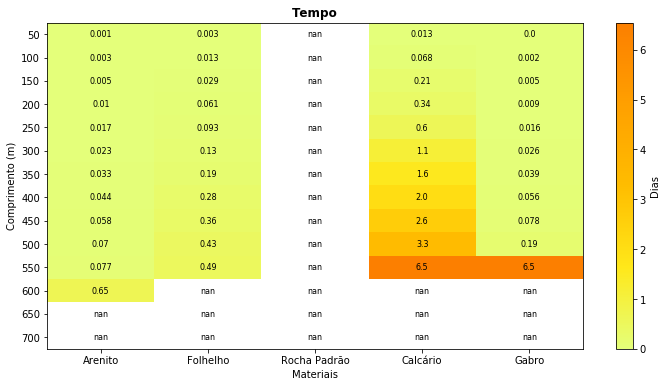

In [61]:
dataframes = [df_are, df_shale, df_std, df_lime ,df_gab]
var = 'Int_fluxo_mes'

for df in dataframes:
    print("θ:", _theta,"º","Acc",_aceitacao,"cm-²Sr-¹")
    viabilidade(df,var)
    print("")
    
reload(modulo_funcoes)
from modulo_funcoes import mesh_dado

for df in (df_are, df_shale, df_std, df_lime, df_gab):
    df['Tempo'] = df['Tempo'].replace('inf', 'INDISTINGUÍVEL')
    df['Profundidade (m)'] = pd.to_numeric(df['Profundidade (m)'], errors='coerce')
    df['Tempo'] = pd.to_numeric(df['Tempo'], errors='coerce')
    
colunas = ['Tempo']

for coluna in colunas: 
    mesh_dado(coluna, df_are, df_shale, df_std, df_lime, df_gab)
#substituir 'inf' por 'INDISTINGUÍVEL' não deu certo, virou NaN


Interpretação:
Tomando uma aceitação de 100 cm2 sr e a curva I, descobrimos que N pode ser tão alto quanto 1000 múons por dia para uma espessura de rocha L≈100 m ou tão baixo quanto 1 múon por dia para L≈1000 m.

Se quisermos medir 1000 muons esperando estar em um meio de variação de tanto, em relação à rocha padrao de 2.65g/cm², teremos que trabalhar com tempo de aquisição aproximadamente de tanto.

Para medir 100 muons a 500m de rocha padrão, precisamos medir x dias. Se quisermos distinguir uma rocha com 10% mais densidade que a rocha padrão, a gente precisaria medir por + y dias para termos uma medida confiável, de acordo com Lesparre x anos. - Leonardo

Fim de caderno.

Contagem do número de muons **com a acceptance definida anteriormente**.

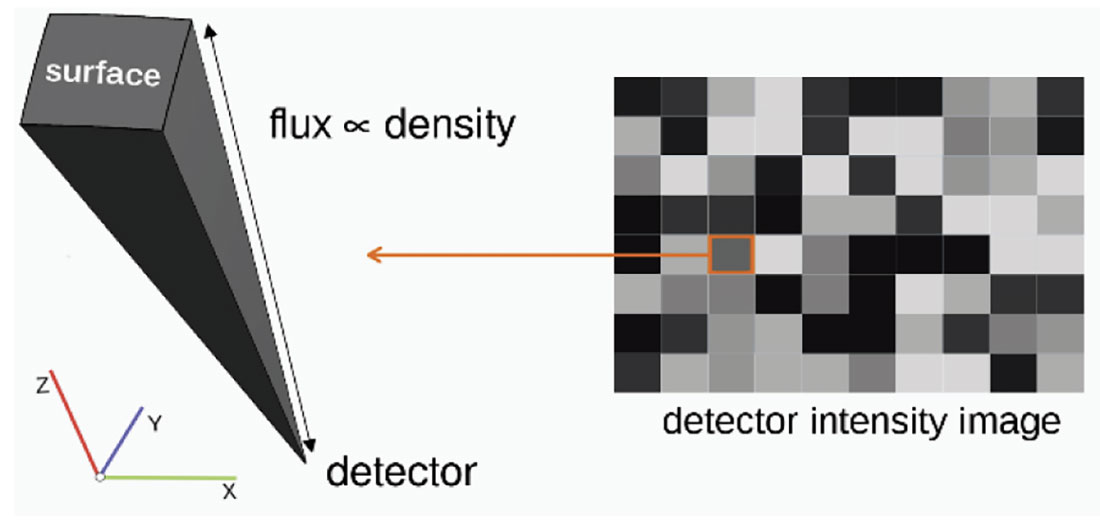
https://www.csegrecorder.com/articles/view/muon-geotomography-a-novel-field-proven-3d-density-imaging-technique

recuperação da densidade com $\mu$ o coeficiente linear de atenuação:


$$\varrho = -\frac{1}{\kappa} \ln \frac{\Phi}{\Phi_0}$$

$$\kappa = \frac{\mu}{\rho}$$



seleciono o dataframe em análise de recuperaçao de densidade:

In [67]:
def recupera_densidade(df):
    print(df['Densidade (g/cm³)'][0], "g/cm³")
    df['Densidade Estimada'] = np.nan
    df['Média Densidade'] = np.nan
    df['Desvio Padrão Densidade'] = np.nan
    
    for loc in range(len(df)):

        N = len(Lm)
        Opacidade = np.zeros((N,N))
        Densidade = np.zeros((N,N))
        R = np.zeros((N,N))

        rho = df["Densidade (g/cm³)"][loc]          # g/cm3
        Superficie_fluxo = df["Superficie_fluxo"]
        Int_fluxo = df["Int_fluxo"]
        z = Lm

        for i in range(N):
            for j in range(N):

                if z[i] > 0.1:    

                    R[i] = Int_fluxo[i]/Superficie_fluxo[i] 
                    mu = np.log(1/R[i])/(z[i]*1e5)          #coeficiente linear de atenuação 

                    kappa = mu/rho                          #segunda equação

                    Opacidade[i] = (-1/kappa)*np.log(R[i])      #equação opacidade eq1
                    Densidade[i] = Opacidade[i]/(z[i]*1e5)     # rho = op / l   desde: op = rho * ll

        mean = np.mean(Densidade[Densidade != 0])
        std = np.std(Densidade[Densidade != 0])
        df.at[loc, 'Densidade Estimada'] = mean
        df.at[loc, 'Média Densidade'] = mean
        df.at[loc, 'Desvio Padrão Densidade'] = std

        print ("Densidade estimada : %f +- %fe-15 g/cm³" % (mean, std*1e15))
    return


2.65 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³
Densidade estimada : 2.650000 +- 0.517348e-15 g/cm³


In [69]:
for df in (df_are, df_shale, df_std, df_lime, df_gab):
    recupera_densidade(df)
    df

2.357 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
Densidade estimada : 2.357000 +- 0.569207e-15 g/cm³
2.512 g/cm³
Densidade estimada : 2.512000 +- 0.474751e-15 g/cm³
Densidade estimada : 2.512000 +- 0.474751e-15 g/cm³
Densidade estimada : 2.512000 +- 0.474751e-15 g/cm³
Densidade estimada : 2.512000 +- 0.474751e-15 g/cm³
Densidade estimada : 2.512000 +- 0.47475

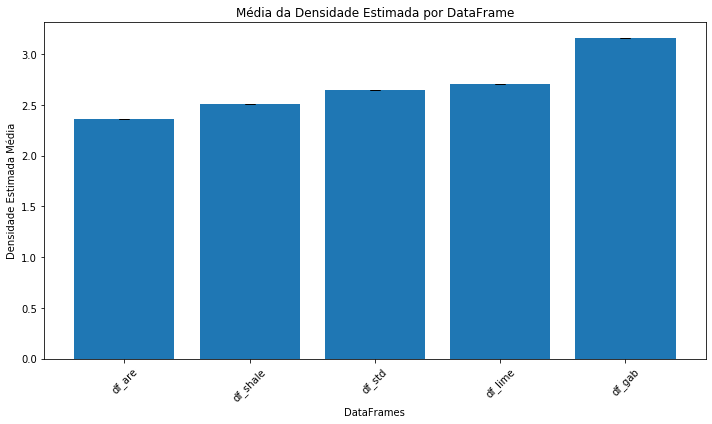

In [71]:
import matplotlib.pyplot as plt

# Supondo que os cálculos tenham sido feitos e as colunas 'Densidade Estimada', 'Média Densidade' e 'Desvio Padrão Densidade' estejam preenchidas nos DataFrames

# Listas para armazenar médias e desvios padrão
means = []
stds = []

# Iterar pelos DataFrames
for df in (df_are, df_shale, df_std, df_lime, df_gab):
    # Calcular a média e o desvio padrão da densidade estimada para cada DataFrame
    mean_density = df['Média Densidade'].mean()
    std_density = df['Desvio Padrão Densidade'].mean()
    
    means.append(mean_density)
    stds.append(std_density)

# Nomes para os DataFrames
dataframes_names = ['df_are', 'df_shale', 'df_std', 'df_lime', 'df_gab']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dataframes_names, means, yerr=stds, capsize=5)
plt.xlabel('DataFrames')
plt.ylabel('Densidade Estimada Média')
plt.title('Média da Densidade Estimada por DataFrame')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()
 

C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\steph\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


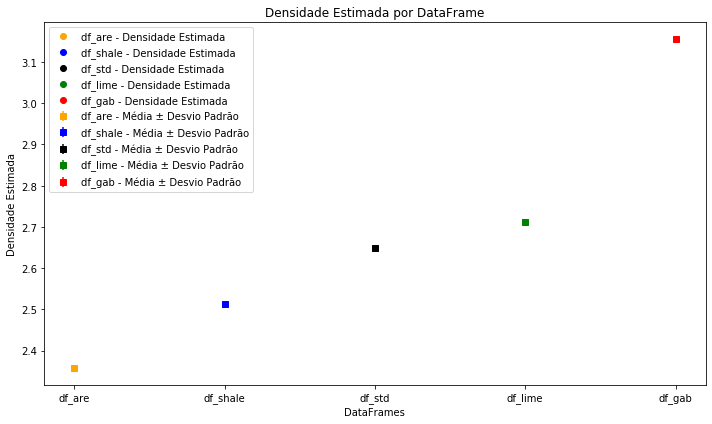

In [76]:
import matplotlib.pyplot as plt

# Supondo que os cálculos tenham sido feitos e as colunas 'Média Densidade' e 'Desvio Padrão Densidade' estejam preenchidas nos DataFrames

# Lista para armazenar os DataFrames
dataframes = [df_are, df_shale, df_std, df_lime, df_gab]

# Cores para as linhas
cores = ['orange', 'b', 'k', 'g', 'r']

plt.figure(figsize=(10, 6))

# Iterar pelos DataFrames e plotar as linhas de média e desvio padrão
for i, df in enumerate(dataframes):
    mean_density = df['Média Densidade'].mean()
    std_density = df['Desvio Padrão Densidade'].mean()
    plt.plot([i]*len(df), df['Densidade Estimada'], 'o', color=cores[i], label=f'{dataframes_names[i]} - Densidade Estimada')
    plt.errorbar(i, mean_density, yerr=std_density, fmt='s', color=cores[i], label=f'{dataframes_names[i]} - Média ± Desvio Padrão')
    plt.plot([i, i], [mean_density - std_density, mean_density + std_density], color=cores[i])

plt.xlabel('DataFrames')
plt.ylabel('Densidade Estimada')
plt.title('Densidade Estimada por DataFrame')
plt.xticks(range(len(dataframes)), dataframes_names)
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()


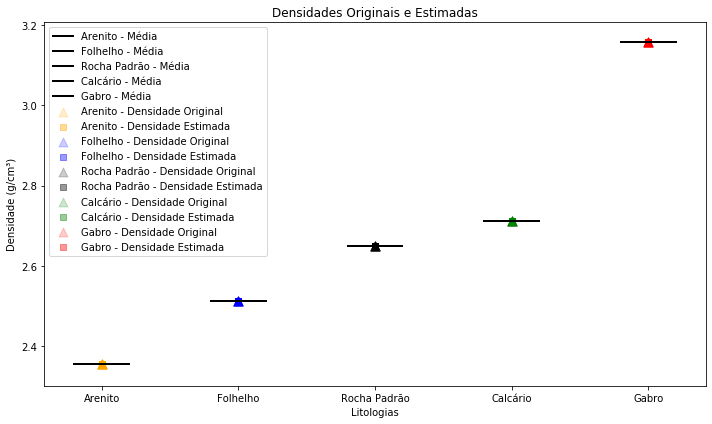

In [98]:
import matplotlib.pyplot as plt

# Supondo que as colunas 'Densidade (g/cm³)', 'Densidade Estimada', 'Média Densidade' e 'Desvio Padrão Densidade' estejam preenchidas nos DataFrames

dataframes = [df_are, df_shale, df_std, df_lime, df_gab]
dataframes_names = ['Arenito', 'Folhelho', 'Rocha Padrão', 'Calcário', 'Gabro']

cores = ['orange', 'blue', 'black', 'green', 'red']

plt.figure(figsize=(10, 6))

for i, df in enumerate(dataframes):
    mean_density = df['Média Densidade'].mean()
    std_density = df['Desvio Padrão Densidade'].mean()
    
    # Densidades originais
    plt.scatter([i]*len(df), df['Densidade (g/cm³)'], color=cores[i], marker='^', s=80, label=f'{dataframes_names[i]} - Densidade Original', alpha=0.2)
    
    # Densidades estimadas
    plt.scatter([i]*len(df), df['Densidade Estimada'], color=cores[i], marker='s', s=40, label=f'{dataframes_names[i]} - Densidade Estimada', alpha=0.4)
    
    # Barras de erro verticais para o desvio padrão
    plt.errorbar([i]*len(df), df['Densidade Estimada'], yerr=std_density, fmt=' ', color=cores[i], alpha=0.5, elinewidth=2, capsize=5)
    
    # Linha de média
    plt.plot([i - 0.2, i + 0.2], [mean_density]*2, color='black', linestyle='-', linewidth=2, label=f'{dataframes_names[i]} - Média')

plt.xlabel('Litologias')
plt.ylabel('Densidade (g/cm³)')
plt.title('Densidades Originais e Estimadas')
plt.xticks(range(len(dataframes)), ['Arenito', 'Folhelho', 'Rocha Padrão', 'Calcário', 'Gabro'])
plt.legend()
plt.tight_layout()

plt.show()


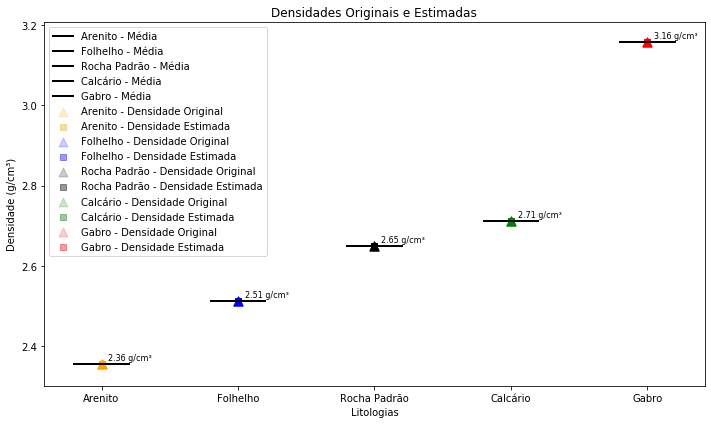

In [100]:
import matplotlib.pyplot as plt

# Supondo que as colunas 'Densidade (g/cm³)', 'Densidade Estimada', 'Média Densidade' e 'Desvio Padrão Densidade' estejam preenchidas nos DataFrames

dataframes = [df_are, df_shale, df_std, df_lime, df_gab]
dataframes_names = ['Arenito', 'Folhelho', 'Rocha Padrão', 'Calcário', 'Gabro']

cores = ['orange', 'blue', 'black', 'green', 'red']

plt.figure(figsize=(10, 6))

for i, df in enumerate(dataframes):
    mean_density = df['Média Densidade'].mean()
    std_density = df['Desvio Padrão Densidade'].mean()
    
    # Densidades originais
    plt.scatter([i]*len(df), df['Densidade (g/cm³)'], color=cores[i], marker='^', s=80, label=f'{dataframes_names[i]} - Densidade Original', alpha=0.2)
    
    # Densidades estimadas
    plt.scatter([i]*len(df), df['Densidade Estimada'], color=cores[i], marker='s', s=40, label=f'{dataframes_names[i]} - Densidade Estimada', alpha=0.4)
    
    # Barras de erro verticais para o desvio padrão
    plt.errorbar([i]*len(df), df['Densidade Estimada'], yerr=std_density, fmt=' ', color=cores[i], alpha=0.5, elinewidth=2, capsize=5)
    
    # Linha de média
    plt.plot([i - 0.2, i + 0.2], [mean_density]*2, color='black', linestyle='-', linewidth=2, label=f'{dataframes_names[i]} - Média')
    
    # Adicionando valor numérico na legenda
    plt.text(i + 0.05, mean_density + 0.01, f'{mean_density:.2f} g/cm³', color='black', fontsize=8)

plt.xlabel('Litologias')
plt.ylabel('Densidade (g/cm³)')
plt.title('Densidades Originais e Estimadas')
plt.xticks(range(len(dataframes)), ['Arenito', 'Folhelho', 'Rocha Padrão', 'Calcário', 'Gabro'])
plt.legend()
plt.tight_layout()

plt.show()
